In [44]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [45]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-03 14:17:03--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-03-03 14:17:03 (142 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [46]:
encoder = LabelEncoder()
y = dataset.pop('expenses')

categorical = ['sex', 'smoker', 'region']
for i in categorical :
  dataset[f'{i}'] = encoder.fit_transform(dataset[f'{i}'])

In [49]:
scaler = StandardScaler()
columns = ['age', 'bmi', 'children']
for i in columns :
  val = dataset[f'{i}'].values
  val = val.reshape(-1,1)
  dataset[f'{i}'] = scaler.fit_transform(val)

In [50]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset,y,test_size = 0.2, random_state = 0)

In [52]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, input_shape = (train_dataset.shape[1],)))
model.add(tf.keras.layers.Dense(1))

In [53]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                112       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.fit(train_dataset, train_labels, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12975.6465 - mae: 12975.6465 - mse: 311166048.0000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11338.7598 - mae: 11338.7598 - mse: 265496288.0000
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8762.1104 - mae: 8762.1104 - mse: 186732384.0000
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7549.9727 - mae: 7549.9727 - mse: 142028848.0000
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6883.5479 - mae: 6883.5479 - mse: 125730040.0000
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6238.8896 - mae: 6238.8896 - mse: 114531192.0000
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 5558.6929 - mae: 5558.6929 - mse: 101500416.0000
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4781.1064 - mae: 4781.1064 - mse: 86137624.0000
Epoch 9/100
34/34 [==

9/9 - 0s - loss: 3040.3667 - mae: 3040.3667 - mse: 39904756.0000 - 113ms/epoch - 13ms/step
Testing set Mean Abs Error: 3040.37 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


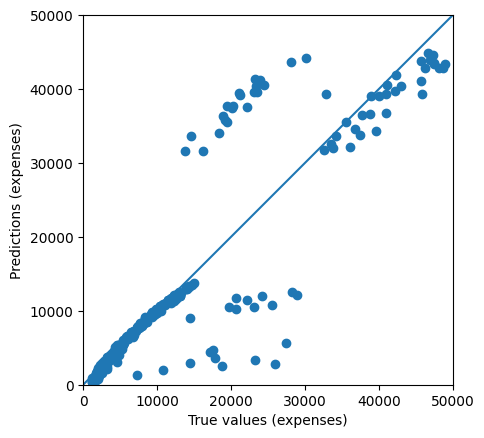

In [55]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)